# Programming exercise – 1

## Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pyquery import PyQuery as pq
import requests
import logging

In [2]:
logging.basicConfig(level=logging.INFO)

## Utility Functions

In [3]:
def load_page(url:str) -> str:
    """
    Retieve a web page from the internet.
    """
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    response  = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.text
    else:
        logging.info(response.text)
        raise Exception("Error loading web page: " + str(response.status_code))

## Retrieve Job Pages of interest

In [4]:
# the job titles to retrieve salaries for
job_titles = [
    {
        'url': 'https://www.glassdoor.com/Salaries/machine-learning-engineer-salary-SRCH_KO0,25.htm',
        'title': 'Machine Learning Engineer'
    },
    {
        'url': 'https://www.glassdoor.com/Salaries/data-scientist-salary-SRCH_KO0,14.htm?clickSource=searchBtn',
        'title': 'Data Scientist'
    },
    {
        'url': 'https://www.glassdoor.com/Salaries/data-engineer-salary-SRCH_KO0,13.htm?clickSource=searchBtn',
        'title': 'Data Engineer'
    },
    {
        'url': 'https://www.glassdoor.com/Salaries/software-engineer-salary-SRCH_KO0,17.htm?clickSource=searchBtn',
        'title': 'Software Engineer'
    },    
    {
        'url': 'https://www.glassdoor.com/Salaries/data-analyst-salary-SRCH_KO0,12.htm?clickSource=searchBtn',
        'title': 'Data Analyst '
    }
]

In [5]:
def request_salary_page(job_title:str):
    """
    Request the web page containing the salary details for the job title.
    """
    return load_page(job_title['url'])

def load_salary_pages(job_titles:list):
    """
    Load the HTML content for all the job titles in the input array.
    """
    for job_title in job_titles:
        logging.info('Loading Job Title Page: %s' % job_title['title'])
        job_title['html'] = request_salary_page(job_title)

load_salary_pages(job_titles)

INFO:root:Loading Job Title Page: Machine Learning Engineer
INFO:root:Loading Job Title Page: Data Scientist
INFO:root:Loading Job Title Page: Data Engineer
INFO:root:Loading Job Title Page: Software Engineer
INFO:root:Loading Job Title Page: Data Analyst 


In [6]:
def parse_job_title_page(job_title:dict):
    """
    Extact the job title salary data from the HTML content retrieved from Glassdoor.
    """
    logging.info('Parsing HTML for: %s' % job_title['title'])
    doc = pq(job_title['html'])

    job_title['l2'] = doc('[data-test=occ-career-progress-0] span.my-xsm.css-1b6bxoo').text()
    job_title['l3'] = doc('[data-test=occ-career-progress-1] span.my-xsm.css-1b6bxoo').text()
    job_title['l4'] = doc('[data-test=occ-career-progress-2] span.my-xsm.css-1b6bxoo').text()

def parse_job_title_pages(job_titles:list):
    """
    Parse the retrieved HTML for all job titles to extact the relevant information.
    """
    for job_title in job_titles:
        parse_job_title_page(job_title)

parse_job_title_pages(job_titles)

INFO:root:Parsing HTML for: Machine Learning Engineer
INFO:root:Parsing HTML for: Data Scientist
INFO:root:Parsing HTML for: Data Engineer
INFO:root:Parsing HTML for: Software Engineer
INFO:root:Parsing HTML for: Data Analyst 


## Create DataFrame

In [7]:
df_salary = pd.DataFrame(job_titles)
df_salary

,url,title,html,l2,l3,l4
0,https://www.glassdoor.com/Salaries/machine-lea...,Machine Learning Engineer,<!DOCTYPE html>\n\n <!DOCTYPE html>...,"$131,001 /yr","$158,508 /yr","$126,710 /yr"
1,https://www.glassdoor.com/Salaries/data-scient...,Data Scientist,<!DOCTYPE html>\n\n <!DOCTYPE html>...,"$117,212 /yr","$142,258 /yr","$138,011 /yr"
2,https://www.glassdoor.com/Salaries/data-engine...,Data Engineer,<!DOCTYPE html>\n\n <!DOCTYPE html>...,"$112,493 /yr","$135,961 /yr","$135,945 /yr"
3,https://www.glassdoor.com/Salaries/software-en...,Software Engineer,<!DOCTYPE html>\n\n <!DOCTYPE html>...,"$108,249 /yr","$131,206 /yr","$141,706 /yr"
4,https://www.glassdoor.com/Salaries/data-analys...,Data Analyst,<!DOCTYPE html>\n\n <!DOCTYPE html>...,"$69,517 /yr","$96,809 /yr","$105,388 /yr"


### Data Clean

In [8]:
def clean_salary(salary:pd.Series) -> pd.Series:
    """
    Remove the charcters from the salary to leave only the numeric value.
    """
    return salary.str.replace('$', '', regex=False).str.replace('/yr', '', regex=False).str.replace(',', '').astype(int)

# lean the salary columns
df_salary.l2 = clean_salary(df_salary.l2)
df_salary.l3 = clean_salary(df_salary.l3)
df_salary.l4 = clean_salary(df_salary.l4)

# change the title to a categorical value
df_salary.title = df_salary.title.astype('category')

df_salary.head()

,url,title,html,l2,l3,l4
0,https://www.glassdoor.com/Salaries/machine-lea...,Machine Learning Engineer,<!DOCTYPE html>\n\n <!DOCTYPE html>...,131001,158508,126710
1,https://www.glassdoor.com/Salaries/data-scient...,Data Scientist,<!DOCTYPE html>\n\n <!DOCTYPE html>...,117212,142258,138011
2,https://www.glassdoor.com/Salaries/data-engine...,Data Engineer,<!DOCTYPE html>\n\n <!DOCTYPE html>...,112493,135961,135945
3,https://www.glassdoor.com/Salaries/software-en...,Software Engineer,<!DOCTYPE html>\n\n <!DOCTYPE html>...,108249,131206,141706
4,https://www.glassdoor.com/Salaries/data-analys...,Data Analyst,<!DOCTYPE html>\n\n <!DOCTYPE html>...,69517,96809,105388


In [9]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   url     5 non-null      object  
 1   title   5 non-null      category
 2   html    5 non-null      object  
 3   l2      5 non-null      int64   
 4   l3      5 non-null      int64   
 5   l4      5 non-null      int64   
dtypes: category(1), int64(3), object(2)
memory usage: 545.0+ bytes


## Data Visualization

Text(0, 0.5, 'Salary')

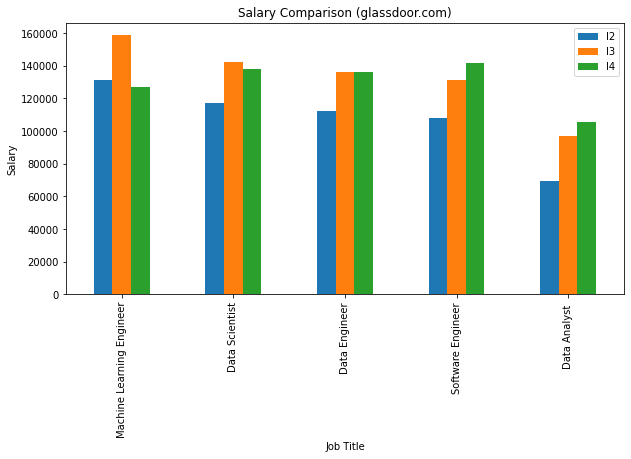

In [10]:
ax = df_salary.plot(x='title', y=['l2', 'l3', 'l4'], kind='bar', figsize=(10, 5))
ax.set_title('Salary Comparison (glassdoor.com)')
ax.set_xlabel('Job Title')
ax.set_ylabel('Salary')